Importing the libraries

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Reading the .csv file

In [36]:
#df = pd.read_csv("../data/csat_clean.csv")
df = pd.read_csv("../data/csat_with_clusters.csv")
summ = pd.read_csv("../data/cluster_summaries.csv")

print("Rows:", len(df))
print("Clusters:", df["cluster"].nunique())

Rows: 36161
Clusters: 10


Plotting the basic graphs

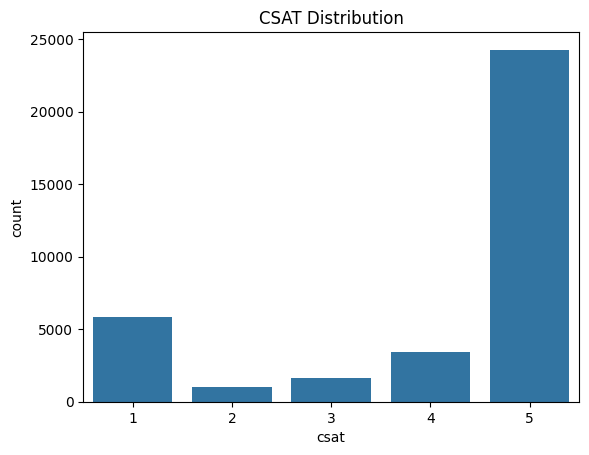

In [37]:
sns.countplot(x="csat", data=df)
plt.title("CSAT Distribution")
plt.show()

CSAT medium by cluster

In [38]:
cluster_stats = df.groupby("cluster")["csat"].agg(["count", "mean"]).reset_index()
cluster_stats = cluster_stats.merge(summ[["cluster", "llm_summary"]], on="cluster", how="left")


Bar graphs

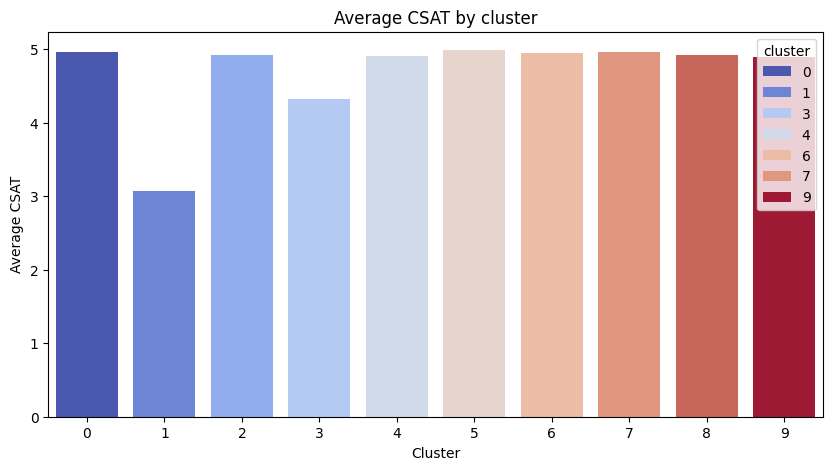

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(x="cluster", y="mean", hue ="cluster", data=cluster_stats, palette="coolwarm")
plt.title("Average CSAT by cluster")
plt.ylabel("Average CSAT")
plt.xlabel("Cluster")
plt.show()

Top Negative Clusters

In [40]:
low_csat = cluster_stats.sort_values("mean").head(5)
low_csat[["cluster", "mean", "count", "llm_summary"]]

,cluster,mean,count,llm_summary
1,1,3.075682,11469,### Titre : Communication Clientèle\n\n#### Résumé des idées principales :\n1. **Manque de communication** : Les clients expriment un besoin accru...
3,3,4.317965,15074,"**Titre court :** Qualité du service\n\n**Idées principales :**\n1. Les clients expriment des avis divergents sur la qualité du service, avec des ..."
9,9,4.896869,543,**Titre :** Satisfaction Client Élevée\n\n**Idées principales :**\n1. Les clients expriment une satisfaction générale très positive.\n2. La qualit...
4,4,4.909021,1297,**Titre :** Satisfaction Client\n\n**Idées principales :**\n1. Les clients expriment leur gratitude pour la réactivité et l’efficacité des conseil...
2,2,4.919689,1158,**Titre :** Service Efficace\n\n**Idées principales :**\n1. Les clients expriment une grande satisfaction concernant la rapidité et l'efficacité d...
